<a href="https://www.kaggle.com/code/markusdarkus/first-eda-and-easy-models?scriptVersionId=137492662" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

import torch

import warnings
warnings.simplefilter('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
d1=pd.read_csv("/kaggle/input/parajumpers-products-in-moscow/PJS_AVITO (1).csv")
d2=pd.read_csv("/kaggle/input/parajumpers-products-in-moscow/PJS_AVITO (2).csv")
d3=pd.read_csv("/kaggle/input/parajumpers-products-in-moscow/PJS_AVITO (3).csv")
d4=pd.read_csv("/kaggle/input/parajumpers-products-in-moscow/PJS_AVITO (5).csv")


In [3]:
df=pd.concat([d1, d2,d3,d4],ignore_index=True)

In [4]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'name', 'price', 'desc',
       'rating', 'otz', 'views', 'product_n', 'product_n-href'],
      dtype='object')

In [5]:
df=df.drop(columns=['web-scraper-order', 'web-scraper-start-url', 'product_n', 'product_n-href'])

In [6]:
df.price=df.price.apply(lambda x: "".join(x.split()))
df.price

0      52000
1      46000
2      26999
3      16000
4      23000
       ...  
145    50000
146    12000
147    21000
148    21500
149    35000
Name: price, Length: 150, dtype: object

In [7]:
df.isna().sum()

name      0
price     0
desc      0
rating    5
otz       6
views     0
dtype: int64

In [8]:
df.price=df.price.astype(int)
df.dtypes

name      object
price      int64
desc      object
rating    object
otz       object
views     object
dtype: object

In [9]:
df=df.dropna()

In [10]:
df.head(1)

,name,price,desc,rating,otz,views
0,Куртка пуховик мужской Parajumpers,52000,Куртка пуховик мужской Parajumpers модель TYRI...,"4,9",164 отзыва,320 просмотров


In [11]:
df['otz']=df['otz'].map(lambda x : int(x.split(" ")[0]))
df['views']=df['views'].map(lambda x : int(x.split()[0]))
df['rating']=df['rating'].map(lambda x : float(x.replace(',','.')))

df.sort_values(by=["price"])
df.plot(y="price", color="g", kind="hist",bins=35)
sns.histplot(data=df, color= red, kde=True)

<Axes: xlabel='rating', ylabel='Count'>

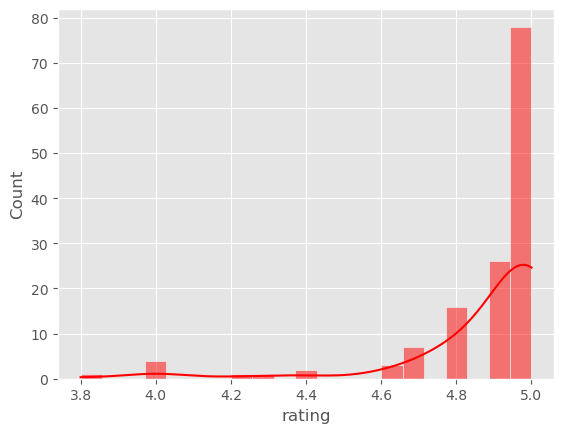

In [12]:
df=df[df["rating"]>=3.5]
sns.histplot(data=df.rating, color= "red", kde=True)

<Axes: xlabel='views', ylabel='Count'>

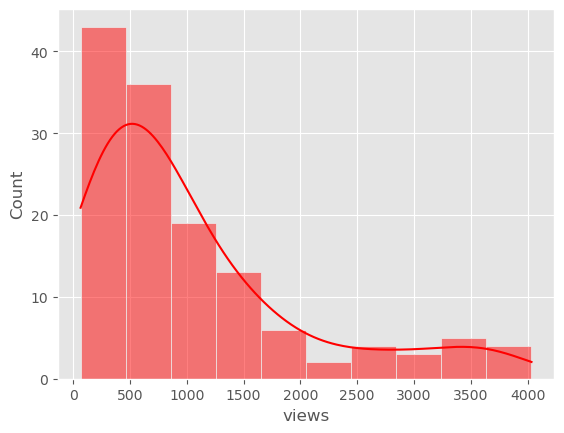

In [13]:
df=df[df["views"]<=5000]
sns.histplot(data=df.views, color= "red", kde=True)


<Axes: xlabel='otz', ylabel='Count'>

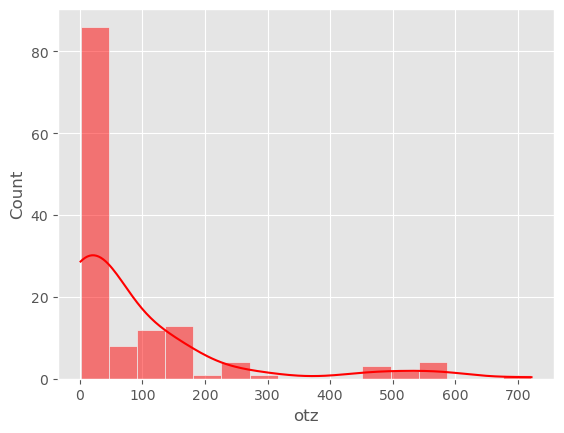

In [14]:
#df=df[df["views"]<=5000]
sns.histplot(data=df.otz, color= "red", kde=True)

<Axes: xlabel='price', ylabel='Count'>

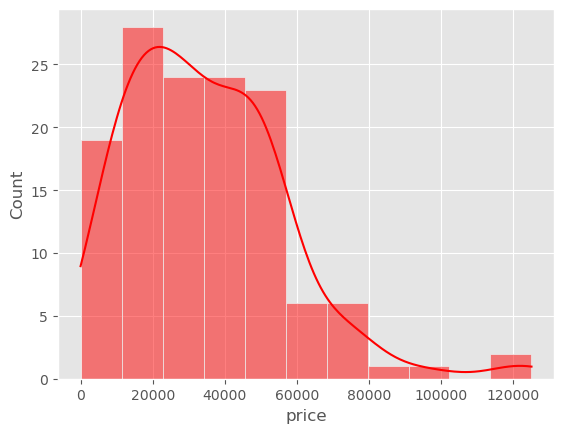

In [15]:
df=df[df["price"]<=150000]
sns.histplot(data=df.price, color= "red", kde=True)

In [16]:
df.isna().sum()

name      0
price     0
desc      0
rating    0
otz       0
views     0
dtype: int64

In [17]:
df.dtypes

name       object
price       int64
desc       object
rating    float64
otz         int64
views       int64
dtype: object

<Axes: >

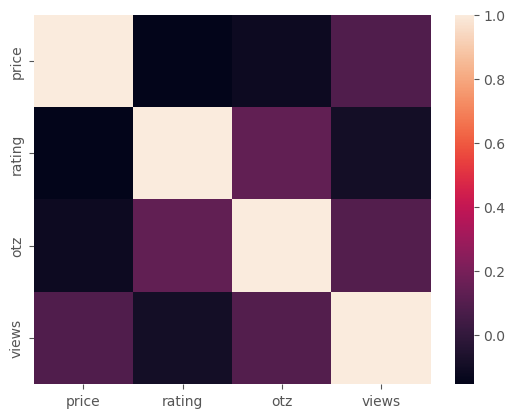

In [18]:
sns.heatmap(df.corr())

In [19]:
import sklearn 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import r2_score


In [20]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [21]:
vectorizer=feature_extraction.text.TfidfVectorizer()

<Axes: >

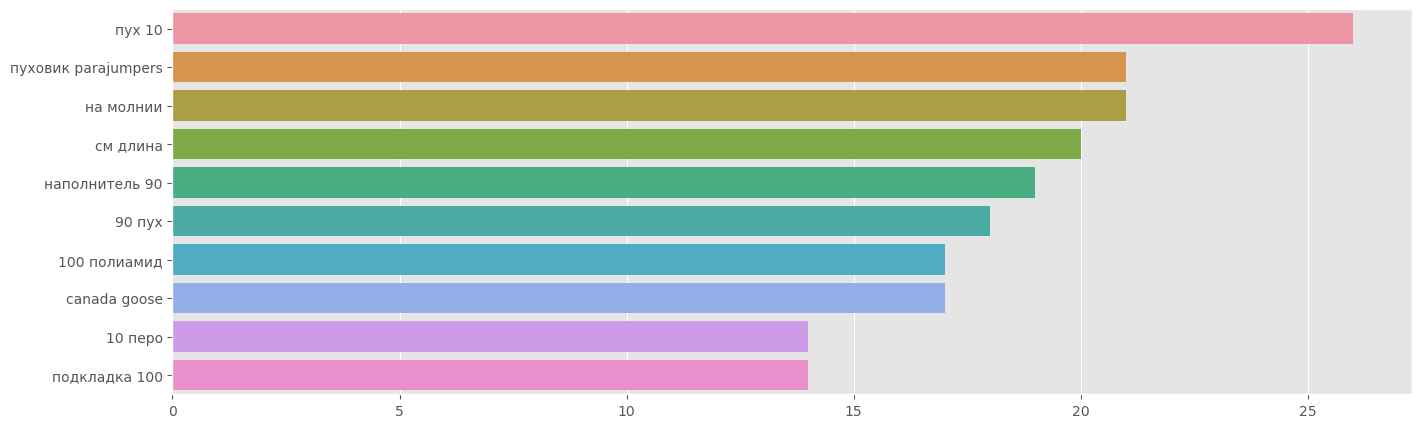

In [22]:
import matplotlib.pyplot as plt
def get_top_tweet_bigrams(corpus, n=None):
    vec = feature_extraction.text.CountVectorizer(ngram_range=(2, 2))
    vec.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(df['desc'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [23]:

train_vectors = vectorizer.fit_transform(df["name"].tolist())
train_vectors2 = vectorizer.fit_transform(df["desc"].tolist())

df["name"]=train_vectors.todense()
df["desc"]=train_vectors.todense()

In [24]:
"""

train_vectors = count_vectorizer.fit_transform(df["name"])
train_vectors2 = count_vectorizer.fit_transform(df["desc"])
    
df["name"]=train_vectors.todense()"""


'\n\ntrain_vectors = count_vectorizer.fit_transform(df["name"])\ntrain_vectors2 = count_vectorizer.fit_transform(df["desc"])\n    \ndf["name"]=train_vectors.todense()'

<Axes: >

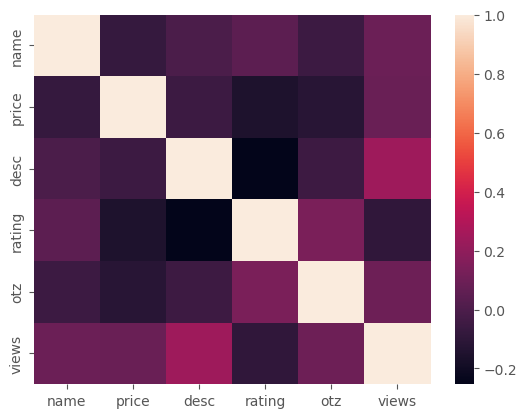

In [25]:
sns.heatmap(df.corr())

In [26]:
from catboost import CatBoostRegressor, cv, Pool
from sklearn.model_selection import train_test_split

In [27]:
model=CatBoostRegressor( random_seed=1, verbose=100)
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["views"]), df["views"], test_size=0.1)

In [28]:
model.fit(X_train, y_train)
cb_preds = model.predict(X_test)

Learning rate set to 0.029288
0:	learn: 946.4028725	total: 56.6ms	remaining: 56.6s
100:	learn: 808.9791817	total: 71.3ms	remaining: 634ms
200:	learn: 697.1593252	total: 86.3ms	remaining: 343ms
300:	learn: 598.5812284	total: 103ms	remaining: 240ms
400:	learn: 520.6887577	total: 122ms	remaining: 183ms
500:	learn: 460.4793384	total: 145ms	remaining: 144ms
600:	learn: 409.7434266	total: 166ms	remaining: 110ms
700:	learn: 371.1669214	total: 185ms	remaining: 78.9ms
800:	learn: 333.8722003	total: 202ms	remaining: 50.3ms
900:	learn: 303.5452908	total: 220ms	remaining: 24.1ms
999:	learn: 277.4326722	total: 239ms	remaining: 0us


In [29]:
print(f"r2 = {r2_score(y_test,cb_preds)}")

r2 = -0.48296136443853666
